<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


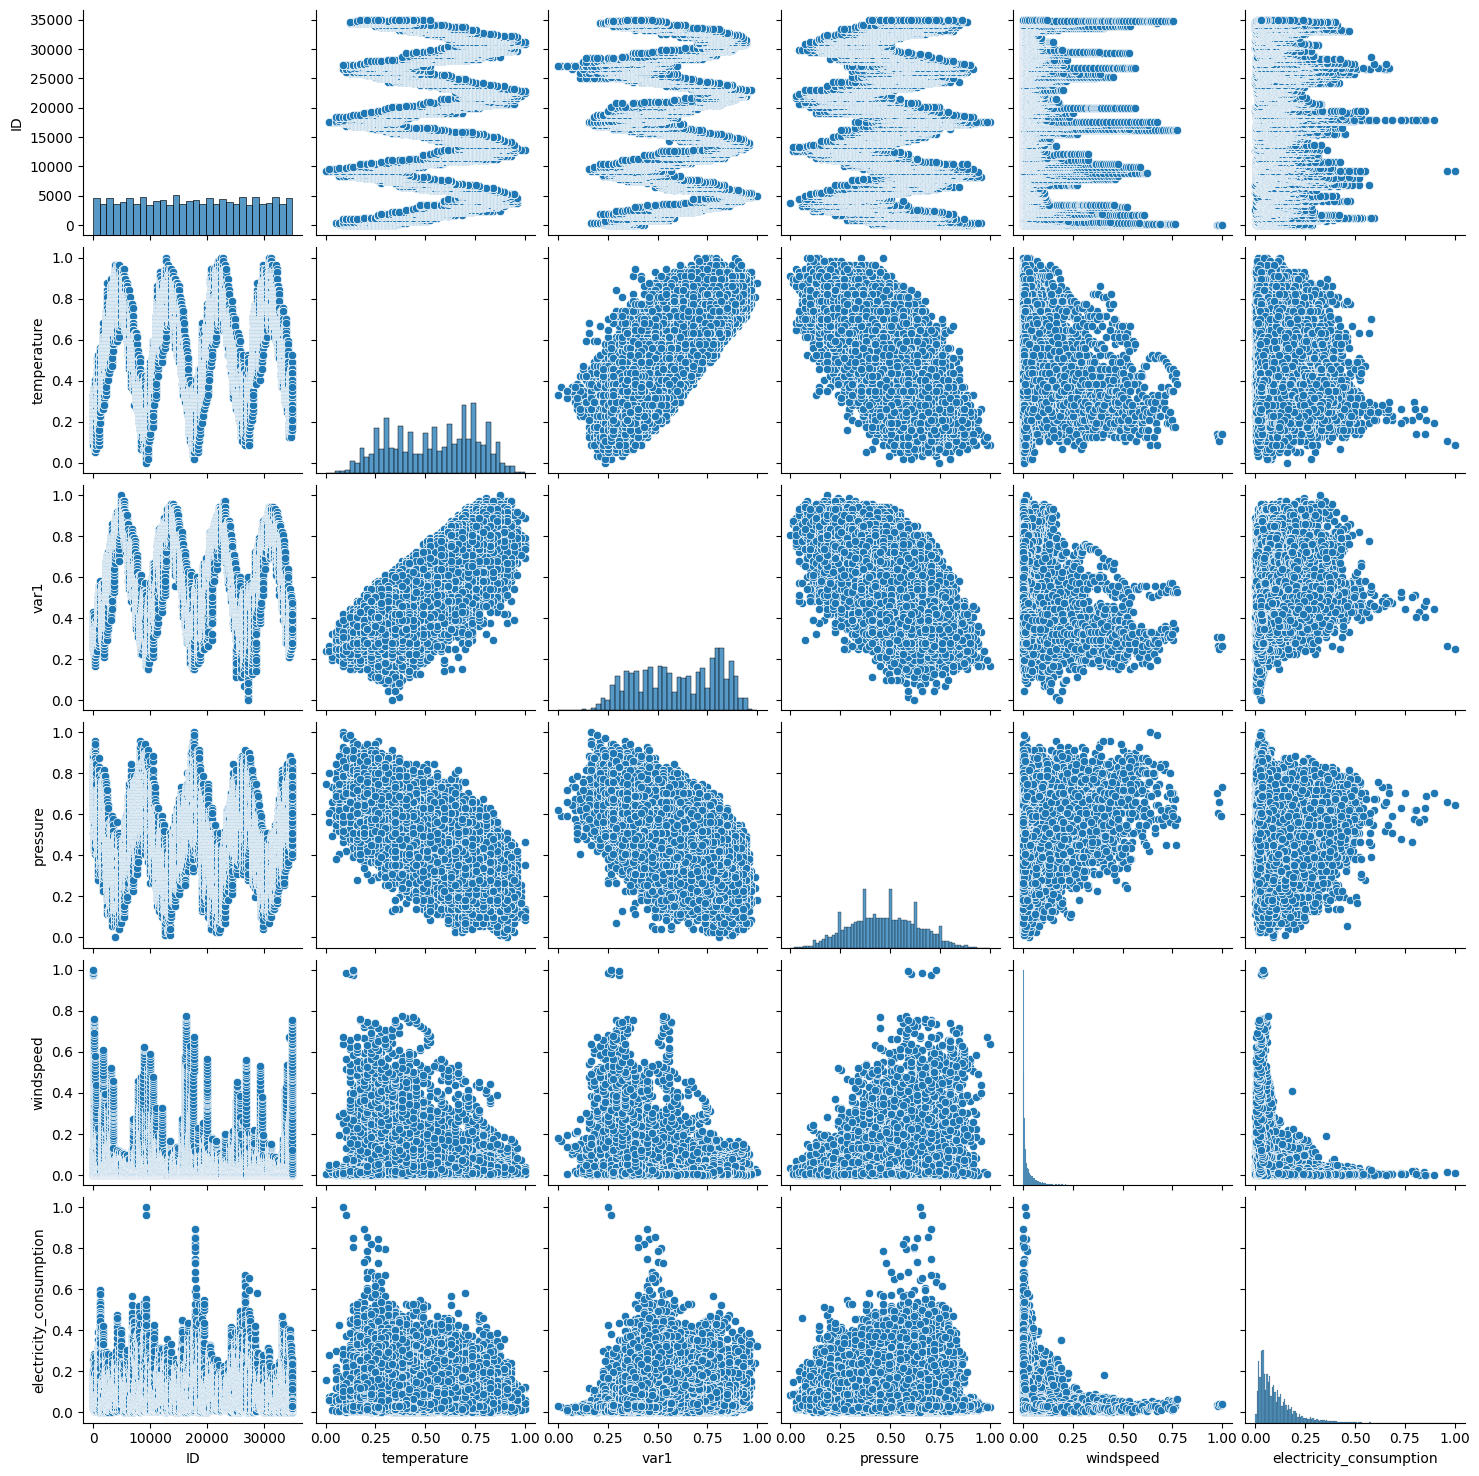

In [3]:
from utils import *
import pandas as pd
import seaborn

df = load_data('../data/train.csv')
df = normalise_data(df)
seaborn.pairplot(df)